# The IPython kernel is a polyglot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Julia: seamless 2-way integration

In [2]:
%load_ext julia.magic
%julia @pyimport matplotlib.pyplot as plt
%julia @pyimport numpy as np

Initializing Julia interpreter. This may take some time...


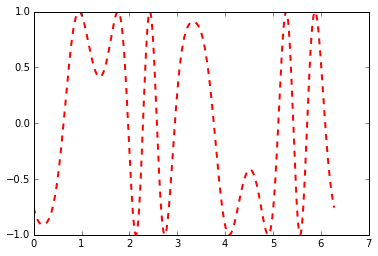

In [3]:
%%julia
# Note how we mix numpy and julia:
t = linspace(0,2*pi,1000); # use the julia linspace
s = sin(3*t + 4*np.cos(2*t)); # use the numpy cosine and julia sine
fig = plt.gcf()
plt.plot(t, s, color="red", linewidth=2.0, linestyle="--")

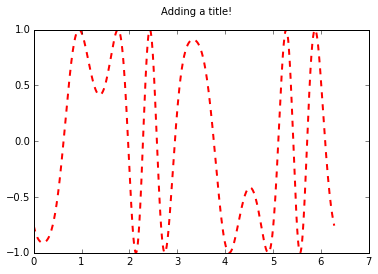

In [4]:
fig = %julia fig
fig.suptitle("Adding a title!")
fig

# R

In [5]:
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])
# Now, load R support
%load_ext rpy2.ipython


Call:
lm(formula = Y ~ X)

Residuals:
   1    2    3    4    5 
-0.2  0.9 -1.0  0.1  0.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   3.2000     0.6164   5.191   0.0139 *
X             0.9000     0.2517   3.576   0.0374 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7958 on 3 degrees of freedom
Multiple R-squared:   0.81,	Adjusted R-squared:  0.7467 
F-statistic: 12.79 on 1 and 3 DF,  p-value: 0.03739



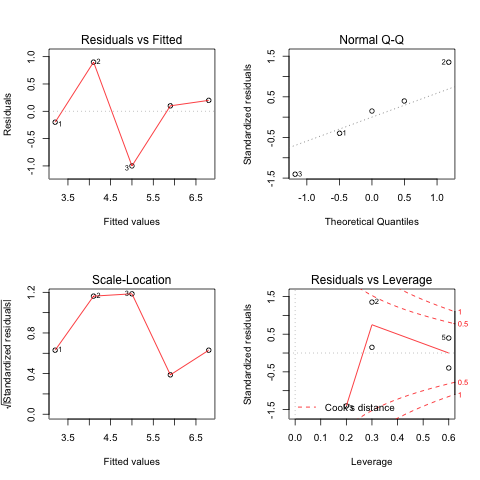

In [6]:
%%R -i X,Y -o XYcoef
XYlm = lm(Y~X)
XYcoef = coef(XYlm)
print(summary(XYlm))
par(mfrow=c(2,2))
plot(XYlm)

And now, `XYcoef` is a *Python* variable:

In [7]:
XYcoef

<FloatVector - Python:0x11dc91c88 / R:0x119dd76e8>
[3.200000, 0.900000]

You can even use standard R packages like ggplot:

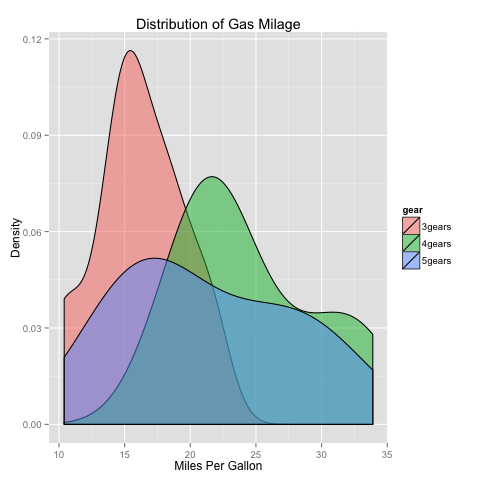

In [8]:
%%R
library(ggplot2) 
mtcars$gear <- factor(mtcars$gear,levels=c(3,4,5), labels=c("3gears","4gears","5gears")) 
mtcars$am <- factor(mtcars$am,levels=c(0,1), labels=c("Automatic","Manual")) 
mtcars$cyl <- factor(mtcars$cyl,levels=c(4,6,8), labels=c("4cyl","6cyl","8cyl")) 
qplot(mpg, data=mtcars, geom="density", fill=gear, alpha=I(.5), 
   main="Distribution of Gas Milage", xlab="Miles Per Gallon", 
   ylab="Density")

# Cython: Speed up Python, C integration

In [9]:
%load_ext Cython

In [10]:
def f(x):
    return x**2-x

def integrate_f(a, b, N):
    s = 0; dx = (b-a)/N
    for i in range(N):
        s += f(a+i*dx)
    return s * dx

In [11]:
%%cython -a
cdef double fcy(double x) except? -2:
    return x**2-x

def integrate_fcy(double a, double b, int N):
    cdef int i
    cdef double s, dx
    s = 0; dx = (b-a)/N
    for i in range(N):
        s += fcy(a+i*dx)
    return s * dx

In [12]:
%timeit integrate_f(0, 1, 100)
%timeit integrate_fcy(0, 1, 100)

10000 loops, best of 3: 35.8 µs per loop
The slowest run took 5.27 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 324 ns per loop


# Or Fortran

In [13]:
%load_ext fortranmagic

In [14]:
%%fortran
subroutine f1(x, y, n)
    real, intent(in), dimension(n) :: x
    real, intent(out), dimension(n) :: y
    !intent(hide) :: n
    y = sin(x**2)-cos(x)
end subroutine f1

	Building module "_fortran_magic_2f8e87f7fc0a3f7bba259e37a9a7378e"...
		Constructing wrapper function "f1"...
		  y = f1(x,[n])
	Wrote C/API module "_fortran_magic_2f8e87f7fc0a3f7bba259e37a9a7378e" to file "/var/folders/j1/n8kn9ftd7257n2rvkkzlj3mc0010dw/T/tmpkebkomrt/src.macosx-10.5-x86_64-3.4/_fortran_magic_2f8e87f7fc0a3f7bba259e37a9a7378emodule.c"


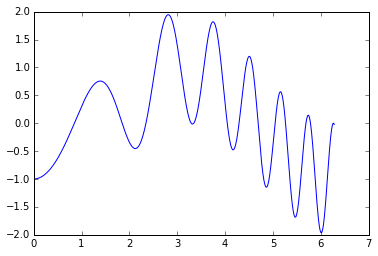

In [15]:
t = np.linspace(0,2* np.pi, 1000)
plt.plot(t, f1(t));

# Bash

In [16]:
%%bash
uname -a
echo $PWD

Darwin denali.local 14.5.0 Darwin Kernel Version 14.5.0: Wed Jul 29 02:26:53 PDT 2015; root:xnu-2782.40.9~1/RELEASE_X86_64 x86_64
/Users/fperez/teach/ucb-bootcamp/DataFiles_and_Notebooks/13_AdvancedIPython


# Ruby

In [17]:
%%ruby
s = "Yo IPython, Ruby's here 4 real!"
s.split(" ").each do |word| 
    puts word if word.to_i.to_s == word
end

4
